In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sub=pd.read_csv('Submission.csv')
pat_mon_rev_train=pd.read_csv('patient_monthwise_revenue_train.csv')
pat_mon_rev_test=pd.read_csv('patient_monthwise_revenue_test.csv')
physio_diagnosis_train=pd.read_csv('physio_diagnosis_train.csv')
patient_train_classified=pd.read_csv('patient_train_classified.csv')
physio_appts_train=pd.read_csv('physio_appts_train.csv')
df_train=pd.read_csv('training_5.csv')
df_test=pd.read_csv('training_ready.csv')
patient_monthwise_revenue_test=pd.read_csv('patient_monthwise_revenue_test.csv')
physio_diagnosis_test=pd.read_csv('physio_diagnosis_test.csv')

C:\Users\HarShreya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\HarShreya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
train_4=pd.read_csv('training_4.csv')

In [7]:
train_4.shape

(48727, 11)

In [8]:
df_train.shape

(47648, 10)

In [15]:
df_train.head()

,pid,bucket,service,age,gender,city,ref_type,ref_name,ref_source,s/c,avg_nps
0,400061,3,10,62,1,3,1,77,4,0.500000,10
1,25535,0,10,42,0,0,1,136,5,0.741176,\N
2,409013,3,10,67,1,21,1,91,5,0.583333,10
3,164585,2,10,75,0,11,1,150,0,0.500000,\N
4,56960,2,10,63,1,3,1,150,9,0.800000,\N


In [9]:
#we need avg_nps, the last dataset from which we can extract it has much more rows than our final training data,
#this can be observed from the difference in the shape above.
ref_=[]
for index,rows in df_train.iterrows():
    ref_.append(pat_mon_rev_train[pat_mon_rev_train.patient_id==rows.pid].avg_nps)

    

In [12]:
ref1=[]
for i in ref_:
    ref1.append(str(i).split("\n")[0].split(" ")[4])
df_train['avg_nps']=pd.Series(ref1)

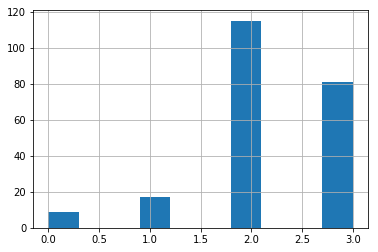

In [20]:
df_train[df_train.avg_nps=='0'].bucket.hist()

In [21]:
pat_mon_rev_train.head()

,patient_id,visit_month_year,service_id,visits_count,city,revenue,ref_type,ref_name,ref_source,service_name,...,FVS,approx_age,gender,LVD,brand,visits_required,diagnosis,avg_nps,Unnamed: 20,Unnamed: 21
0,10020,04/15,2,1,Chennai,500.0,B2C,None,Direct Organic,P,...,P,62,male,21/04/2015,Portea,1,Post Operative condition of Cardiac Valve repl...,\N,NaN,NaN
1,10293,04/17,2,7,Mumbai,4900.0,B2C,Facebook,Digital + ATL,P,...,P,42,female,25/04/2017,Portea,8,Rheumatoid arthritis,9,NaN,NaN
2,10381,07/15,2,1,NCR,500.0,B2C,None,Direct Organic,P,...,P,67,male,11/09/2015,Portea,10,frozen shoulder,8,NaN,NaN
3,10381,08/15,2,20,NCR,9500.0,B2C,None,Direct Organic,P,...,P,67,male,11/09/2015,Portea,10,frozen shoulder,8,NaN,NaN
4,10381,08/15,98,1,NCR,0.0,B2C,None,Direct Organic,P,...,P,67,male,11/09/2015,Portea,10,frozen shoulder,8,NaN,NaN
